In [1]:
# importação de arquivo
import pandas as pd
import numpy as np
# visualização de gráficos
import seaborn as sns
# visualização de gráficos
import matplotlib.pyplot as plt
# visualizar grafico dinâmico 
import plotly.express as px
# GaussianNB - Nome de uma distirbuição estatistica (usado para problemas genericos
from sklearn.naive_bayes import GaussianNB
import pickle

/var/folders/vq/2hrn0h_n07g09ltbxxy7p30jfw_32m/T/ipykernel_76889/2162110501.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [5]:
with open('./../base/census.pkl', 'rb') as f:
    X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste = pickle.load(f)

In [6]:
X_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [7]:
X_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

In [8]:
naive_census = GaussianNB()
naive_census.fit(X_census_treinamento, y_census_treinamento)
previsoes = naive_census.predict(X_census_teste)
previsoes

array([' >50K', ' >50K', ' >50K', ..., ' <=50K', ' >50K', ' >50K'],
      dtype='<U6')

In [9]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [12]:
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix

In [13]:
accuracy_score(y_census_teste, previsoes) # se não executar o escalonamento aumenta para 70%

0.4767656090071648

0.4767656090071648

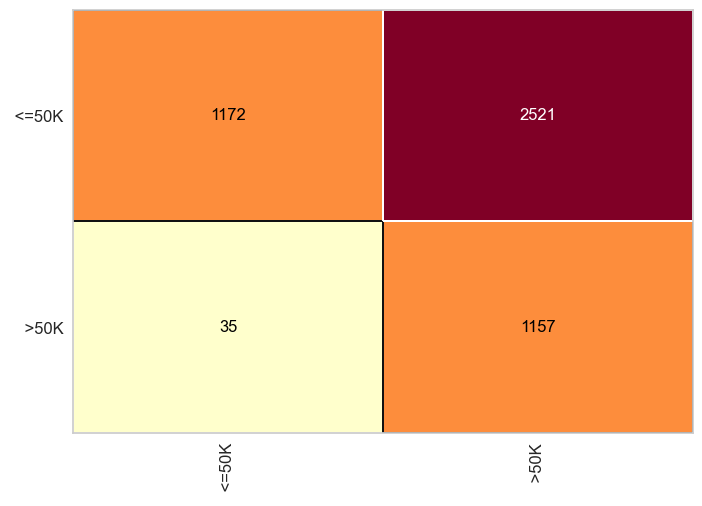

In [14]:
cm = ConfusionMatrix(naive_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_teste, y_census_teste)

In [15]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.97      0.32      0.48      3693
        >50K       0.31      0.97      0.48      1192

    accuracy                           0.48      4885
   macro avg       0.64      0.64      0.48      4885
weighted avg       0.81      0.48      0.48      4885

